该脚本提供了若干种给地震、台站、数据添加权重的方法

This script provides several methods to add weights to earthquake, station and traveltime data

In [1]:
# load functions for data processing
%run ../utils/functions_for_data.ipynb

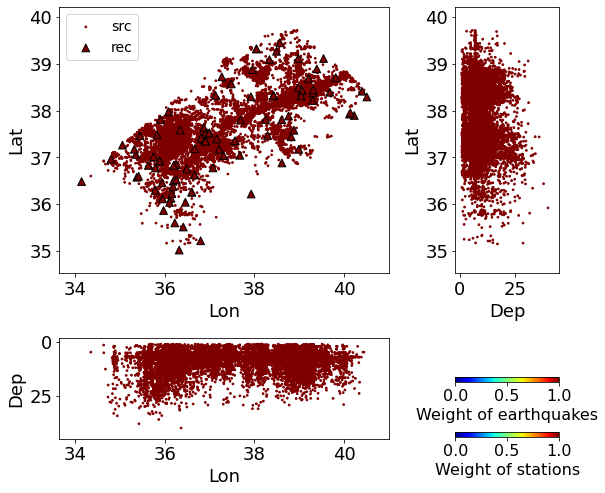

In [2]:
# 读取数据文件 read .dat file
fname = "output_data/alg3_src_rec.dat"
[ev_info_obs, st_info_obs] = read_src_rec_file(fname)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)


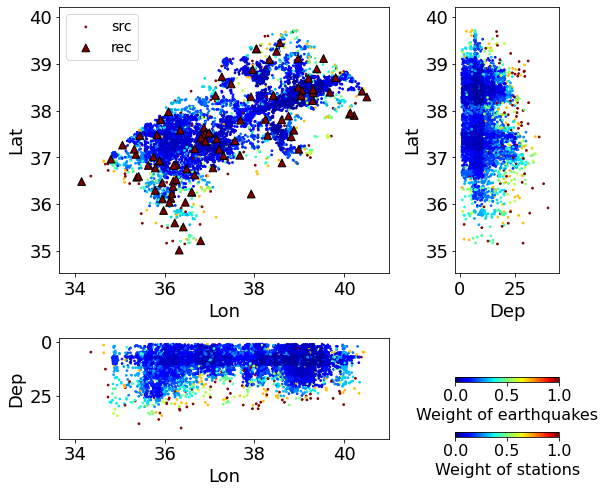

In [3]:
# 选项1，给地震增加 box weighting. 将区域划分为若干个box，每个box内的台站权重相同，均设置为 1/sqrt(N)，其中 N 是该box内台站总数量。
# Option 1, assign box weighting to the earthquake. Divide the region into several boxes, and the station weights in each box are the same, all set to 1/sqrt(N), where N is the total number of stations in the box.
%run ../utils/functions_for_data.ipynb
# box size is dlon*dlat*ddep (degree, degree, km)
dlon = 0.4
dlat = 0.4
ddep = 5
ev_info_obs = box_weighting_ev(ev_info_obs,dlon,dlat,ddep)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)


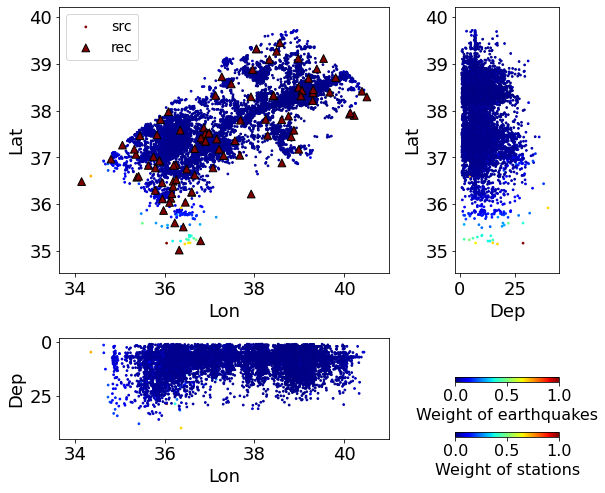

In [4]:
# 选项2，给地震增加 geographical weighting (粗糙版). inspired by [Youyi Ruan et al., 2019, GJI]
# Option 2, assign geographical weighting to the earthquake roughly.
%run ../utils/functions_for_data.ipynb
# box size is dlon*dlat*ddep (degree, degree, km)
dlon = 0.2
dlat = 0.2
ddep = 5
ev_info_obs = geographical_weighting_ev_rough(ev_info_obs,dlon,dlat,ddep)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)


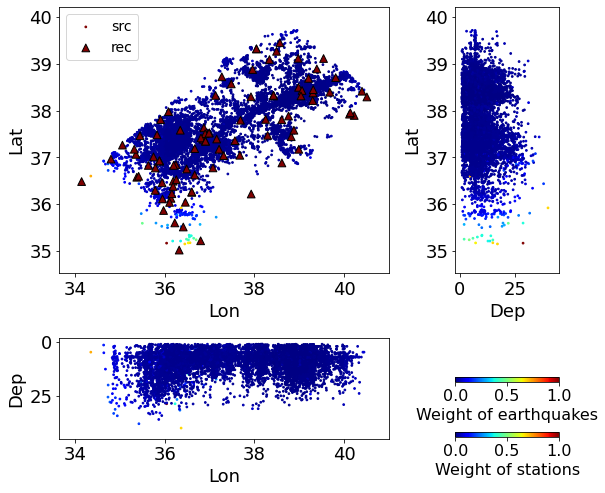

In [5]:
# 选项3，不对地震加权，而是对地震做 declustering. 将区域划分为若干个subdomain，按照到时数量排序，每个box内仅保留到时数量最多的若干个的地震，
# option 3, declustering. Divide the region into several subdomains, retain the top N earthquakes in terms of the number of arrival times in each subdomain.

dlon = 0.02; dlat = 0.02; ddep = 1;  # subdomain size (degree, degree, km)
Top_N = 1 # retain the top N earthquakes in each subdomain
ev_info_obs = limit_earthquake_decluster_Nt(ev_info_obs, dlon, dlat, ddep,Top_N)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)

In [ ]:
# 选项4，对台站加权 box_weighting. add box weighting to the stations.



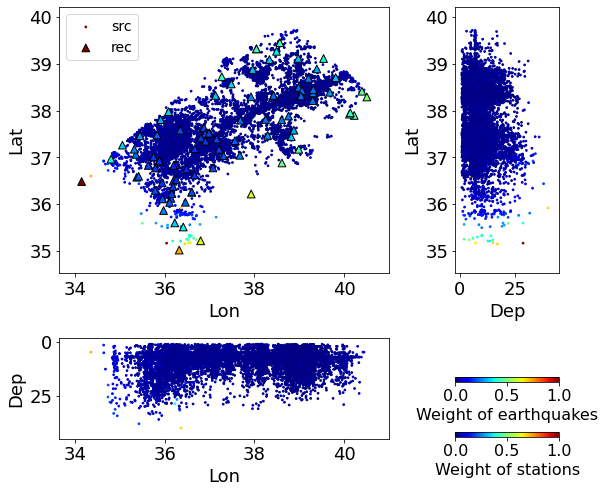

In [7]:
# 选项5，对台站加权 geographical_weighting. add geographical weighting to the stations. [Youyi Ruan et al., 2019, GJI]
%run ../utils/functions_for_data.ipynb
# box size is dlon*dlat*ddep (degree, degree, km)

(ev_info_obs,st_info_obs) = geographical_weighting_st(ev_info_obs,st_info_obs)

# 权重分布画图 plot weight distribution
fig_ev_st_distribution_wt(ev_info_obs, st_info_obs)